# 노드 9. 워드 임베딩

In [ ]:
!mkdir -p content/work/word_embedding

**벡터화**


*   Bag of words
    *   https://www.youtube.com/watch?v=dKYFfUtij_U
    *   bag of words 방법을 사용할 때는 주로 불필요한 단어를 제거하거나 표현은 다르지만 같은 단어를 통합시켜주는 정규화와 같은 전처리
    *   bag of words는 단어를 카운트하는 방법론이기 때문에 불필요한 카운트는 미리 배제하는 것이 좋기 때문

*   DTM(문서 단어 행렬, Document-Term Matrix)
    *   Bag of words를 사용하여 문서 간 유사도를 비교하기 위한 행렬
    *   DTM의 행을 문서 벡터, 열을 단어 벡터라고 볼 수 있으며, DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0이라는 특징을 가지고 있는 벡터를 희소 벡터(sparse vector)라고 함
    *   문서의 수나 단어의 수가 많아질수록 행렬에서 대부분의 값이 0이 되는 희소 문제는 점점 심화된다는 특징

*   단어장(vocabulary)
    *   중복 카운트는 배제한 단어들의 집합(set)
    *   DTM의 행을 문서 벡터, 열을 단어 벡터라고 볼 수 있으며, DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0이라는 특징을 가지고 있는 벡터를 희소 벡터(sparse vector)라고 함

*   TF-IDF
    *   https://youtu.be/meEchvkdB1U
    
*   원-핫 인코딩(one-hot encoding)
    *   모든 단어의 관계를 독립적으로 정의
    *    원-핫 인코딩을 하기 위해서는 우선 갖고 있는 텍스트 데이터에서 단어들의 집합인 단어장(vocabulary) 을 만듦
    *    그 후 단어장에 있는 모든 단어에 대해서 1부터 V까지 고유한 정수를 부여
    *    정수는 단어장에 있는 각 단어의 일종의 인덱스 역할 수행
    *    각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터가 됨(원-핫 벡터(one-hot vector))

**벡터화 실습: 원-핫 인코딩 구현해보기**

Step 1. 패키지 설치하기

In [ ]:
# 한국어로 실습하기 위해서 한국어 형태소 분석기 패키지 KoNLPy를 설치

!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,628 B]
Get:5 https://cli.github.com/packages stable InRelease [3,917 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:9 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,640 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [70.9 kB]
Get:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:14 

In [ ]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [ ]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

Step2. 전처리 이야기


*   모음과 자음 범위 : https://www.unicode.org/charts/PDF/U3130.pdf
*   완성형 한글의 범위 : https://www.unicode.org/charts/PDF/UAC00.pdf



In [ ]:
# 한글, 공백을 제외한 모든 문자를 표현하는 정규표현식(regex) : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]

reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


Step 3. 토큰화 이야기

In [ ]:
# KoNLPy에 내장된 Okt 형태소 분석기를 사용(KoNLPy Okt : https://konlpy.org/en/latest/api/konlpy.tag/#okt-class)

%%time
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']
CPU times: user 9.22 s, sys: 492 ms, total: 9.71 s
Wall time: 5.79 s


Step 4. 단어장 만들기


*   도수가 높은 단어일수록 낮은 정수를 부여



In [ ]:
# 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트(https://docs.python.org/3/library/collections.html#collections.Counter)

vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


In [ ]:
vocab['임금님']

2

In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


In [ ]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


Step 5. 원-핫 벡터 만들기

In [ ]:
# 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수

def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector
print("슝=3")

슝=3


In [ ]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

파이토치를 통한 원-핫 인코딩(one-hot encoding)

In [ ]:
import torch
import torch.nn.functional as F
from collections import Counter
print("임포트 완료")

임포트 완료


In [ ]:
# 위에서 예로 들었던 3개의 문서를 text에 저장

text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

In [ ]:
# 반복문을 사용하면 주어진 텍스트로부터 단어장을 만들고, 단어장의 각 단어에 고유한 정수를 맵핑해줌

text = [['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']] # 데이터
counter = Counter(word for sentence in text for word in sentence) # 단어 등장 빈도 계산
word_index = {word: i+1 for i, (word, _) in enumerate(counter.most_common())}
word_index["<PAD>"] = 0   # OOV(Out-of-Vocabulary) 처리를 위해 기본 인덱스 설정

print(word_index)

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5, '<PAD>': 0}


In [ ]:
vocab_size = len(word_index) # 단어 사전 크기
print("슝=3")

슝=3


vocab_size를 구할 때 1을 더해주는 이유


*   실제로 자연어 처리를 할 때는 0번 단어가 특별 토큰으로 단어장에 추가되는 경우가 많기 때문
*   주로 0번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데, 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 word_index에 1을 더해서 단어장의 크기를 *저장*

In [ ]:
# 단어장이 저장되었으므로, 단어장에 속한 단어들로 구성된 텍스트 시퀀스는 반복문을 통해 정수 시퀀스로 변환

sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = [word_index.get(word, 0) for word in sub_text]  # OOV 단어는 0으로 처리
print(encoded)

# 결과는 텍스트 시퀀스가 정수 시퀀스로 변환되는 것을 보여줌
# 앞에서 강아지는 1번, 고양이는 2번, 컴퓨터는 4번으로 정수가 부여
# 이렇게 변환된 정수 시퀀스는 F.one_hot()을 사용해 원-핫 벡터의 시퀀스로 변환 가능

[1, 2, 1, 4]


In [ ]:
# 각 단어가 단어장의 크기인 6차원의 벡터로 변환된 것을 확인

encoded_tensor = torch.tensor(encoded, dtype=torch.long) # PyTorch 텐서 변환
one_hot = F.one_hot(encoded_tensor, num_classes=len(word_index))
print(one_hot)

tensor([[0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]])


**워드임베딩**

희소 벡터(Sparse Vector)의 문제점
*   DTM, TF-IDF, 원-핫 벡터는 단어장의 크기에 영향을 받는 희소 벡터(sparse vector) 라는 특징을 가지고 있음
*   원-핫 인코딩의 경우 단어장의 크기가 30,000이라면, 30,000개의 모든 단어 벡터는 각각 30,000 차원의 벡터가 되는데 이 벡터들은 하나의 원소만 1이고 29,999개의 원소가 0의 값을 가짐
*   사람은 직관적으로 '강아지'와 '고양이'라는 두 단어의 의미적 유사성이 '강아지'와 '컴퓨터'라는 두 단어의 의미적 유사성보다는 높다고 판단할 수 있지만, 원-핫 벡터는 이를 반영하지 못함(벡터 간 유사도를 구하는 방법으로는 대표적으로 내적(inner product)이 있습니다. 임의의 두개의 원-핫 벡터 간 내적(inner product)을 구해보면, 대부분 서로 직교(orthogonal)하여 그 값은 0입니다. 이는 거의 모든 원-핫 벡터의 상호 유사도가 0임을 의미하며. 결국 원-핫 벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없음을 의미합니다.)

차원의 저주
*   https://leedakyeong.tistory.com/entry/curse-of-dimensionality-%EC%B0%A8%EC%9B%90%EC%9D%98-%EC%A0%80%EC%A3%BC
*   https://thesciencelife.com/archives/1001

워드 임베딩(Word Embedding)
*   워드 임베딩에서도 한 단어를 일정한 길이의 벡터로 변경(더 많은 단어가 있다고 해서 벡터의 길이가 길어지지 않음)
*   일반적으로 벡터의 길이가 단어장 크기보다 매우 작기 때문에 각 벡터 값에 정보가 축약되어야 하고 결국 밀집 벡터(dense vector)가 됨
*   2003년 요슈아 벤지오(Yoshua Bengio) 교수가 NPLM(Neural Probabilistic Language Model) 이란 모델을 통해 제안(https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)(당시 이 모델은 학습 속도가 지나치게 느리다는 단점이 있었고, 2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 Word2Vec 을 제안하였으며, Word2Vec 이후로 FastText 나 GloVe 등과 같은 임베딩 방법이 추가로 제안)

희소 벡터(sparse vector)와 밀집 벡터(dense vector)
*   https://www.pinecone.io/learn/series/nlp/dense-vector-embeddings-nlp/

Q. 임베딩 벡터의 값은 어떤 방식을 통해서 얻어지나요?
*   훈련 데이터를 사용해 어떤 모델을 학습하는 과정에서 loss function 설정, gradient descent 를 통해 '자동'으로 얻어집니다.


**Word2Vec**

*   분포가설
    *   ‘비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.’
*   매커니즘
    *   https://youtu.be/sY4YyacSsLc
*   CBoW(Continuous Bag of Words)
    *   주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법
    *   예문 : "I like natural language processing."
    *   CBoW는 중간에 있는 단어를 예측하는 방법이므로 {"i", "like", "language", "processing"}으로부터 "natural"을 예측하는 것은 CBoW가 하는 일
    *   이때 예측해야 하는 단어 "natural"을 중심 단어(center word) 라고 하고, 예측에 사용되는 단어들을 주변 단어(context word) 라고 함
    *   중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정를 결정했다면, 그 범위를 윈도우(window) 라고 함
    *   문제점 : Out-of-vocabulary(단어 집합에 없는 단어), Polysemy(다의어), 문맥 파악의 한계 등
    *   [슬라이딩 윈도우]
        *   윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만드는 방법
        *   ((like), I), ((I, natural), like), ((like, language), natural), ((natural, processing), language), ((language), processing)
        *   이렇게 선택된 데이터셋에서 단어 각각은 원-핫 인코딩되어 원-핫 벡터가 되고, 원-핫 벡터가 CBoW나 Skip-gram의 입력이 됨
    *   [CBoW]
        *   윈도우 크기가 m이라면 2m개의 주변 단어를 이용해 1개의 중심 단어를 예측하는 과정에서 두 개의 가중치 행렬(matrix)을 학습하는 것이 목적
        *   주황색 사각형이 첫 번째 가중치 행렬 W, 초록색 사각형이 두 번째 가중치 행렬 W′
        *   두 개의 가중치 행렬이 있다는 것을 인공 신경망 구조에서 보면 CBoW는 입력층, 은닉층, 출력층 이렇게 3개의 층으로만 구성된 인공 신경망이라는 의미    
    *   [가중치 행렬의 크기 (5 × 4)일 때의 룩업 테이블]
        *    주변 단어로 선택된 각각의 원-핫 벡터는 첫 번째 가중치 행렬과 곱해지게 됨(가중치 행렬의 크기는 (V × N))
        *   원-핫 벡터는 각 단어의 정수 인덱스 i에 해당되는 위치에만 1의 값을 가지므로, 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i 위치에 있는 행을 그대로 가져오는 것과 동일   
        *   테이블에서 값을 그대로 룩업(lookup)해오는 것과 같다고 하여 룩업 테이블(lookup table) 이라고 함
    *   [은닉층 연산]
        *    룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가짐
        *    CBoW에서는 이 벡터들을 모두 합하거나, 평균을 구한 값 을 최종 은닉층의 결과로 함(최종 은닉층의 결과도 N차원의 벡터가 됨)
        *    Word2Vec에서는 은닉층에서 활성화 함수나 편향(bias)을 더하는 연산을 하지 않음
        *   Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer) 이라고도 함
    *   [출력층 연산]
        *   은닉층에서 생성된 N차원의 벡터는 두 번째 가중치 행렬과 곱해(가중치 행렬의 크기는 (N×V)이므로, 곱셈의 결과로 나오는 벡터의 차원은 V)
        *   출력층은 활성화 함수로 소프트맥스 함수를 사용하므로 이 V차원의 벡터는 활성화 함수를 거쳐 모든 차원의 총합이 1이 되는 벡터로 변경

**Skip-gram**

*   중심 단어로부터 주변 단어를 예측한다는 점, 그리고 이로 인해 중간에 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없어졌다는 점만 제외하면 CBoW와 메커니즘 자체는 동일(CBoW는 주변 단어(Context Words)를 가지고 중심 단어(Target Word)를 예측하는 모델로 주어진 문맥에서 중심 단어를 예측하는 것이 목적)

**네거티브 샘플링(negative sampling)**

*   연산량을 줄이기 위해서 소프트맥스 함수를 사용한 V개 중 1개를 고르는 다중 클래스 분류 문제 를 시그모이드 함수를 사용한 이진 분류 문제로 변경(Ex. 중심 단어와 주변 단어가 '사과', '딸기'와 같이 과일과 관련된 단어라면, '필통', '연필'이라는 연관 관계가 없는 단어들의 임베딩 값을 굳이 업데이트할 필요가 없음)
*   랜덤으로 단어장에 있는 아무 단어나 가져와 target word로 하는 거짓 데이터셋을 만들고 0으로 레이블링을 해주는 것

**영어 Word2Vec 실습과 OOV 문제**

In [ ]:
!pip install nltk==3.9.1
!pip install gensim==4.3.2
!pip install scipy==1.12.0 numpy==1.26.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 84.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=26332398 sha256=ffdd442696f2e061eec9b6df219bab41e7b9355b57b4908c4a7c3ebd2786e8a5
  Stored in directory: /root/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
  Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 17.7 MB/s eta 0:00:00
Using cached numpy-1.26.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully unin

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

슝~


In [ ]:
# 코퍼스가 정상적으로 로딩되었는지 확인하기 위해 3개의 샘플만 출력

print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [ ]:
# vector size = 학습 후 임베딩 벡터의 차원
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBoW, 1은 Skip-gram

%%time
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!
CPU times: user 14.5 s, sys: 736 ms, total: 15.3 s
Wall time: 11 s


In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233729839324951), ('skull', 0.9110310077667236), ('Bang', 0.9057203531265259), ('asteroid', 0.9051412343978882), ('third', 0.901971697807312), ('baby', 0.8993672728538513), ('dog', 0.898586094379425), ('bought', 0.8974260687828064), ('rally', 0.8912877440452576), ('dinosaur', 0.888901948928833)]


In [ ]:
import os

os.makedirs("/content/work/word_embedding", exist_ok=True)

In [ ]:
from gensim.models import KeyedVectors

save_path = "/content/work/word_embedding/w2v.txt"

model.wv.save_word2vec_format(save_path, binary=False)

loaded_model = KeyedVectors.load_word2vec_format(save_path, binary=False)

print("모델 load 완료!")

모델 load 완료!


In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233729839324951), ('skull', 0.9110310077667236), ('Bang', 0.9057203531265259), ('asteroid', 0.9051412343978882), ('third', 0.901971697807312), ('baby', 0.8993672728538513), ('dog', 0.898586094379425), ('bought', 0.8974260687828064), ('rally', 0.8912877440452576), ('dinosaur', 0.888901948928833)]


Word2Vec의 OOV 문제
*   Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있음
*   사전에 없는 단어에 대해서 Word2Vec은 임베딩 벡터값을 얻을 수 없음



In [ ]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('overacting')

KeyError: "Key 'overacting' not present in vocabulary"

In [ ]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('memorry')

KeyError: "Key 'memorry' not present in vocabulary"

**임베딩 벡터의 시각화**

In [ ]:
# 필요한 파일 만들기

!python -m gensim.scripts.word2vec2tensor --input ~/work/word_embedding/w2v --output ~/work/word_embedding/w2v

2026-01-28 03:41:30,858 - word2vec2tensor - INFO - running /usr/local/lib/python3.12/dist-packages/gensim/scripts/word2vec2tensor.py --input /root/work/word_embedding/w2v --output /root/work/word_embedding/w2v
2026-01-28 03:41:30,859 - keyedvectors - INFO - loading projection weights from /root/work/word_embedding/w2v
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/gensim/scripts/word2vec2tensor.py", line 94, in <module>
    word2vec2tensor(args.input, args.output, args.binary)
  File "/usr/local/lib/python3.12/dist-packages/gensim/scripts/word2vec2tensor.py", line 68, in word2vec2tensor
    model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=binary)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gensim/models/keyedvector

In [ ]:
!ls content/work/word_embedding/

ls: cannot access 'content/work/word_embedding/': No such file or directory


임베딩 프로젝터에 tsv 파일 업로드하기
*   https://projector.tensorflow.org/



**FastText**
*   페이스북에서 개발한 FastText는 Word2Vec 이후에 등장한 워드 임베딩 방법
*   메커니즘 자체는 Word2Vec을 그대로 따르고 있지만, 문자 단위 n-gram(character-level n-gram) 표현을 학습한다는 점에서 다름
*   Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하는 반면, FastText는 단어 내부의 내부 단어(subwords)들을 학습한다는 아이디어를 가지고 있음



FastText의 학습 방법

OOV와 오타에 대한 대응
*   FastText는 Word2Vec과 달리 OOV와 오타에 강건하다(robust) 는 특징
*    이는 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다는 원리에 기인



In [ ]:
# OOV와 오타에 대한 대응

  # FastText는 Word2Vec과 달리 OOV와 오타에 강건하다(robust)는 특징있음
  # 이는 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다는 원리에 기인

%%time
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

FastText 학습 완료!
CPU times: user 44.9 s, sys: 297 ms, total: 45.2 s
Wall time: 25.6 s


In [ ]:
fasttext_model.wv.most_similar('overacting')

[('extracting', 0.9539910554885864),
 ('attracting', 0.9431136250495911),
 ('lifting', 0.9379563927650452),
 ('contracting', 0.9367029070854187),
 ('fluctuating', 0.9365504384040833),
 ('losing', 0.935239315032959),
 ('negotiating', 0.9337245225906372),
 ('malting', 0.9318123459815979),
 ('shifting', 0.9318090081214905),
 ('melting', 0.9305804967880249)]

In [ ]:
fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9498924016952515),
 ('basic', 0.8612754344940186),
 ('...', 0.8439564108848572),
 ('musical', 0.8416712284088135),
 ('intelligence', 0.8412593603134155),
 ('yourself', 0.8405064940452576),
 ('flexibility', 0.837245523929596),
 ('consciousness', 0.8342843651771545),
 ('sense', 0.8308183550834656),
 ('simplistic', 0.8264435529708862)]

**글로브(Global Vectors for Word Representation, GloVe)**
*   2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론
*   워드 임베딩의 두 가지 접근 방법인 카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다 는 것이 특징

잠재 의미 분석(LSA, Latent Semantic Analysis)
*   DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩 하는 방법
*   GloVe 연구진은 Word2Vec의 경우에는 LSA보다 단어 벡터 간 유사도를 구하는 능력은 뛰어나지만, LSA처럼 코퍼스의 전체적인 통계 정보를 활용하지는 못한다는 점을 한계로 지적
*   https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
*   https://youtu.be/GVPTGq53H5I

Q. 행렬 A에 대해서 특이값 분해의 변형인 thin SVD, compact SVD, Truncated SVD를 각각 사용하였을 때, 이 3개의 특이값 분해 중 행렬 A를 복원할 수 있는 특이값 분해는 무엇일까요?
*   thin SVD, compact SVD 두 개는 행렬 A를 복원할 수 있다.

윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
*   윈도우 기반 동시 등장 행렬은 행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고, 어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬
*   이러한 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다는 특징을 가지고 있음

동시 등장 확률(Co-occurrence Probability)
*   동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
*   i를 중심 단어(center word), k를 주변 단어(context word) 라고 함

GloVe의 손실 함수 설계하기
*   https://wikidocs.net/22885
*   동시 등장 행렬을 사용하고 있으니 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이면서, 손실 함수를 통해 모델을 학습시키므로 '예측 기반'의 방법론이라고 할 수 있음
*   중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것(전체 코퍼스에서의 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값의 차이가 최소화되도록 두 벡터의 값을 학습하는 것)






pre-trained GloVe 모델 실습

In [ ]:
# 'Wikipedia 2014 + Gigaword 5' 데이터셋으로 학습된 모델을 로드

import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-50")  # glove vectors 다운로드
glove_model.most_similar("dog")  # 'dog'과 비슷한 단어 찾기

[==================================================] 100.0% 66.0/66.0MB downloaded


[('cat', 0.9218004941940308),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583713531494),
 ('puppy', 0.7754920721054077),
 ('pet', 0.7724708318710327),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570278167725),
 ('bite', 0.7387937307357788)]

In [ ]:
glove_model.most_similar('overacting')

[('impudence', 0.7842012047767639),
 ('puerile', 0.7816032767295837),
 ('winningly', 0.7644237875938416),
 ('grossness', 0.7576098442077637),
 ('deconstructions', 0.748936653137207),
 ('over-the-top', 0.7460805773735046),
 ('buffoonery', 0.746045708656311),
 ('impetuosity', 0.7415392398834229),
 ('sophomoric', 0.736961841583252),
 ('zaniness', 0.7353197336196899)]

In [ ]:
# 에러가 나더라도 놀라지 마세요.
glove_model.most_similar('memoryy')

# GloVe는 Word2Vec과 같이 OOV 문제를 가지고 있어서 'memoryy'라는 단어는 인식하지 못합니다.
# 또한 pre-trained GloVe 모델은 한글이나 알파벳 대문자가 포함된 데이터셋으로 학습하지 않았기 때문에 알파벳 소문자만 인식한다는 사실에 유의하세요!

KeyError: "Key 'memoryy' not present in vocabulary"

Q. 네거티브 샘플링이 어떤 기술이었는지 기억나시나요?
*   주어진 데이터에서 무작위로 음성(negative) 샘플을 추출하는 방법입니다.
이를 통해, 양성 샘플과 음성 샘플의 수를 균형있게 맞추어, 모델이 학습할 수 있는 환경을 만들어줍니다. 예를 들어, 이메일 스팸 필터링 모델에서는, 스팸 데이터와 정상적인 이메일 데이터를 균형있게 추출하여 모델을 학습시키면, 더욱 정확한 분류 결과를 얻을 수 있습니다.
*   네거티브 샘플링은 단순히 무작위 샘플링을 하는 것이 아니라, 더 중요한 샘플에 더 많은 가중치를 부여하여 샘플링 비율을 조절할 수 있습니다. 이를 통해, 모델이 보다 중요한 샘플에 더 집중하도록 할 수 있습니다.

Q. OOV란 어떤 종류의 문제였나요? 이를 해결하기 위한 FastText는 어떤 특징이 있었나요?
*   OOV(Out-Of-Vocabulary) 문제란, 기계학습 모델이 훈련 데이터에서는 보지 못했지만, 테스트 데이터에 등장하는 단어를 인식하지 못하는 문제입니다.
*   FastText는 OOV 문제를 해결하기 위한 특징이 있습니다. 왜냐하면 훈련 데이터에서 등장하지 않은 단어라도 서브워드로 분해하면서 해당 서브워드를 포함하고 있는 다른 단어들의 임베딩 벡터를 활용하여 새로운 단어의 임베딩 벡터를 만들기 때문입니다.



# 노드 10. 임베딩 내 편향성 알아보기

**워드 임베딩의 편향성**

워드 임베딩 속의 편향성
*   2016년에 발표된 'Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings'라는 논문 참조(https://arxiv.org/pdf/1607.06520)
*    학습된 Word Embedding을 2차원으로 차원 축소해서 시각화했을 때, 분명히 젠더 중립적인 단어임에도 불구하고 Programmer, Doctor, Engineer 등의 단어는 남성대명사 He에 가깝게, Homemaker, Nurse, Hairdresser 등의 단어는 여성대명사 She에 가깝게 위치하는 것을 보여 줌

WEAT(Word Embedding Association Test)
*   2016년에 Aylin Caliskan이 제안한 'Semantics derived automatically from language corpora necessarily contain human biases' 논문 참조(https://arxiv.org/pdf/1608.07187)
*   예
      *   Science를 대표하는 target 단어 셋 X와 Art를 대표하는 target 단어 셋 Y가 있다고 하면 X-Y 셋을 통한 개념축 하나가 얻어짐
      *   Male을 대표하는 attribute 단어 셋 A와 Female을 대표하는 attribute 단어 셋 B가 있다면 A-B 셋을 통한 개념축 하나가 또 얻어짐
      *   편향성이 없다면, X에 속한 단어들은 A에 속한 단어들과의 거리와 B에 속한 단어들과의 거리가 별 차이가 없어야 함
      *   절댓값이 클수록 두 개념축 사이의 편향성이 크게 나타나는 것으로 해석

Q. WEAT의 target 과 attribute이 무엇인지 간단하게 설명해 볼까요?
*   target과 attribute는 각각 두 개의 단어 셋(set)을 의미
*   target 셋은 분석하고자 하는 개념이나 집단을 대표하는 단어들의 집합이며, attribute 셋은 특정 속성이나 개념을 대표하는 단어들의 집합임

참고
*   IAT 홈페이지(https://implicit.harvard.edu/implicit/education.html)
    *   WEAT 개념의 아이디어는 심리학의 IAT(Implicit Association Test) 라는 인지편향성 실험 구조에서 따온 것
    *   IAT는 WEAT처럼 X-Y, A-B 두 개념축을 설정하는 점에서는 동일
    *   다만 단어들 사이의 거리를 측정하는 방법이 워드 임베딩간 코사인 유사도를 계산하는 방식이 아니라, 피실험자들에게 전자적으로 단어 연상 실험을 하면서 응답 반응 속도를 측정하는 방식을 사용

구글 개발진들이 논문으로 작성한 WEAT 개념을 소개하면서 첨부한 실험 결과
*   'Text Embedding Models Contain Bias. Here's Why That Matters' 논문 참조(https://research.google/pubs/text-embeddings-contain-bias-heres-why-that-matters/)
*   표에서 파란색은 사람의 편향과 같은 경우이고, 노란색은 사람의 편향과 반대인 경우를 의미(사람이 가진 편향은 Implicit Association Tests로 측정)
*   표를 보면 대부분의 색이 파란색인 것을 볼 수 있음
이 표가 또한 말해주는 것은 사람이 가진 편향이 자연어 코퍼스 데이터에 반영되어 있고, 이 데이터로 만든 워드 임베딩 모델은 그 편향을 내재할 수밖에 없다는 점
*   꽃과 벌레, 유쾌함과 불쾌함 등 누구나 동의할만한 편향성이 존재하는 경우엔 대부분의 경우 WEAT score의 절댓값이 1.5 이상으로 뚜렷한 편향성 수치가 나오는 것을 볼 수 있음


**WEAT 구현하기**

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

print("슝~")

슝~


In [ ]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

print("슝~")

슝~


In [ ]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [ ]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [ ]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

# WEAT score값이 양수이므로, target_X에 있는 '장미'라는 단어는 attribute_B(불쾌)보다 attribute_A(유쾌)와 더 가깝다는 것을 알 수 있음

0.6457646122337399


In [ ]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [ ]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [ ]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [ ]:
def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

#WEAT score가 매우 높게 나온 것을 알 수 있는데, 즉, 꽃은 유쾌한 단어와 상대적으로 가깝고, 곤충은 불쾌한 단어와 가깝다는 것을 수치적으로 확인할 수 있음

1.932


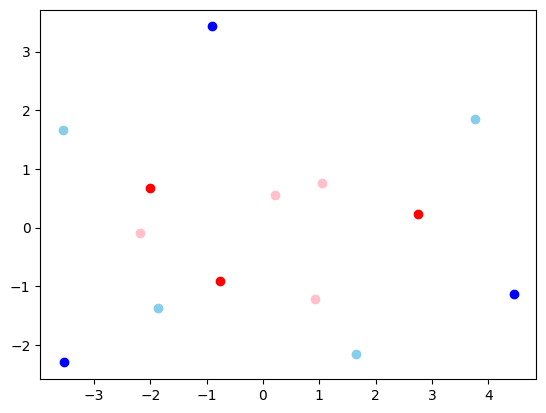

In [ ]:
# PCA를 통해 5차원이었던 벡터를 2차원으로 줄여 그림 생성

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

# 파란색 점(A)과 하늘색 점(X)이 가깝고, 빨간색 점(B)과 분홍색 점(Y)이 가깝게 표현된 것을 확인

**사전학습된 Word Embedding에 WEAT 적용**

In [ ]:
!mkdir -p /content/work/weat/data
!ln -s ~/data/* /content/work/weat/data

In [ ]:
!pip install gensim==4.3.2

# 의존성 연결을 위해 다운그레이드를 진행합니다.
!pip install scipy==1.12.0 numpy==1.26.2

In [ ]:
!gunzip /content/work/weat/data/GoogleNews-vectors-negative300.bin.gz


gzip: /content/work/weat/data/GoogleNews-vectors-negative300.bin.gz: unexpected end of file


In [ ]:
from gensim.models import KeyedVectors

data_dir = "/content/work/weat/data"
model_dir = f"{data_dir}/GoogleNews-vectors-negative300.bin.gz"

w2v = KeyedVectors.load_word2vec_format(
    model_dir,
    binary=True,
    limit=500_000
)

print("Word2Vec 모델 로드 완료")

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다.

Word2Vec 모델 로드 완료


In [ ]:
w2v

In [ ]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다.
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다.
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다.
print(w2v.vectors.shape)

# w2v에는 limit으로 지정한 갯수(디폴트는 3,000,000개)의 단어가 있고, 각 단어는 300차원을 갖는다는 것을 알 수 있음

500000
300
(500000, 300)


In [ ]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [ ]:
w2v.most_similar(positive=['happy'])

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [ ]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662653088569641),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894997596741),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065612435340881),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.5762072205543518),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

In [ ]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301522850990295),
 ('classroom', 0.6281620264053345),
 ('Schools', 0.6172096133232117)]

In [ ]:
# WEAT를 통해 이 모델의 편향성을 확인
  # 논문에 있던 단어 셋으로 구성

target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

# 과학과 관련된 단어가 남성과 관련된 단어와 가깝고, 예술과 관련된 단어가 여성과 관련된 단어와 가깝게 나타남
# 많은 사람이 가진 편향이 임베딩 모델에 반영되었다고 볼 수 있음

1.2624874

In [ ]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

# 인스턴트 식품의 예시와 인스턴트를 의미하는 단어가 가까운 것은 당연함
# 이 경우 모델이 편향되어있다기보다 단어의 의미를 잘 파악했다고 볼 수 있음

1.6909266

In [ ]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_B = ['news', 'report', 'statement', 'broadcast', 'word']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

# 0에 굉장히 가까운 결과를 보였는데 즉, 임베딩 모델이 판단하기에 어느 것끼리 가깝다고 말할 수 없음

-0.05137869

In [ ]:
# target, attribute 셋을 만들어서 WEAT score 도출

target_X = ['pizza', 'coke', 'hamburger', 'fries', 'steak', 'bacon', 'sausage']
target_Y = ['carrot', 'broccoli', 'spinach', 'lettuce', 'cucumber', 'avocado', 'peas']
attribute_A = ['delicious', 'tasty', 'yummy', 'flavorful', 'savory', 'appetizing']
attribute_B = ['healthy', 'nutritious', 'wholesome', 'organic', 'balanced', 'nourishing']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.3638902

In [ ]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


**직접 만드는 Word Embedding에 WEAT 적용**

(1) 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [ ]:
!unzip /content/work/weat/data/synopsis.zip -d /content/work/weat/data

Archive:  /content/work/weat/data/synopsis.zip
  inflating: /content/work/weat/data/synopsis.txt  
  inflating: /content/work/weat/data/synopsis_SF.txt  
  inflating: /content/work/weat/data/synopsis_action.txt  
  inflating: /content/work/weat/data/synopsis_adult.txt  
  inflating: /content/work/weat/data/synopsis_adventure.txt  
  inflating: /content/work/weat/data/synopsis_animation.txt  
  inflating: /content/work/weat/data/synopsis_art.txt  
  inflating: /content/work/weat/data/synopsis_comedy.txt  
  inflating: /content/work/weat/data/synopsis_crime.txt  
  inflating: /content/work/weat/data/synopsis_documentary.txt  
  inflating: /content/work/weat/data/synopsis_drama.txt  
  inflating: /content/work/weat/data/synopsis_etc.txt  
  inflating: /content/work/weat/data/synopsis_family.txt  
  inflating: /content/work/weat/data/synopsis_fantasy.txt  
  inflating: /content/work/weat/data/synopsis_gen.txt  
  inflating: /content/work/weat/data/synopsis_historical.txt  
  inflating: /co

In [ ]:
import os

data_dir = "/content/work/weat/data"
file_name = os.path.join(data_dir, "synopsis.txt")

with open(file_name, "r", encoding="utf-8") as file:
    for i in range(20):
        print(file.readline(), end="")

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [ ]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!echo 'export JAVA_HOME=$(dirname $(dirname $(readlink -f $(which java))))' >> ~/.bashrc
!source ~/.bashrc

!pip install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
31 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree

In [ ]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt

okt = Okt()
tokenized = []

with open(file_name, 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

print("슝~")

슝~


In [ ]:
print(len(tokenized))

71156


(2) 추출된 결과로 embedding model 만들기

In [ ]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=1, sg=0)
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다.
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
# model.most_similar(positive=['영화'])

[('작품', 0.9080453515052795),
 ('다큐멘터리', 0.8626302480697632),
 ('영화로', 0.8329516649246216),
 ('드라마', 0.8273362517356873),
 ('주제', 0.8011261820793152),
 ('형식', 0.7987432479858398),
 ('코미디', 0.79815673828125),
 ('감동', 0.7942838668823242),
 ('스토리', 0.7874883413314819),
 ('소재', 0.7805638313293457)]

In [ ]:
model.wv.most_similar(positive=['사랑'])

[('애정', 0.7441064715385437),
 ('행복', 0.7358816266059875),
 ('진심', 0.729808509349823),
 ('첫사랑', 0.7296572923660278),
 ('근심', 0.7236177921295166),
 ('네타', 0.7224485278129578),
 ('우정', 0.7177537083625793),
 ('만남', 0.7170459628105164),
 ('이별', 0.7170270681381226),
 ('연애', 0.7164564728736877)]

In [ ]:
model.wv.most_similar(positive=['연극'])

[('대본', 0.8967801332473755),
 ('각색', 0.8858308792114258),
 ('영감', 0.8828834891319275),
 ('영화감독', 0.8820978999137878),
 ('캐스팅', 0.8816559314727783),
 ('배우', 0.8807694315910339),
 ('공연', 0.8803350329399109),
 ('시나리오', 0.8795856833457947),
 ('스탭들', 0.8771015405654907),
 ('오페라', 0.8723019957542419)]

(3) TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기


*   예술영화와 일반영화(상업영화)라는 영화구분을 target으로 삼고, 드라마 장르와 액션 장르라는 장르구분을 attribute로 삼아 WEAT score를 계산
*   즉 드라마 장르에는 예술영화적 성격이 강하고, 액션 장르에는 일반(상업)영화적 성격이 강할 것이라는 편향성이 워드 임베딩 상에 얼마나 나타나고 있는지를 측정



In [ ]:
# 'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출하여 art, gen 변수에 할당

import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(data_dir + '/' + file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

print("슝~")

슝~


In [ ]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
art = read_token(art_txt)
gen = read_token(gen_txt)

# WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요합니다.
# 예를 들면 예술영화라는 개념을 가장 잘 대표하는 단어들을 art_txt를 처리해서 만든 art라는 단어 리스트에서부터 골라내야 합니다.
# 이를 위해서 상식을 동원해서 적절한 단어를 골라낼 수도 있지만 보다 납득할 수 있는 보편적인 방법을 사용하는 것이 좋습니다.

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [ ]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])

23976
영화


In [ ]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다.
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다.

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다.

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')

print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 영화제, 사이, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 아빠, 생활, 통해, 모습, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 결혼, 사고, 전쟁, 위기, 때문, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 운명, 결심, 관계, 현실, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 처음, 국제, 누구, 살인, 충격, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 의도, 동생, 하루, 위기, 계획, 정체, 한국, 

In [ ]:
# 우선 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출

n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [ ]:
print(target_art)

['아빠', '음악', '운명', '결심', '지금', '여인', '이름', '이후', '준비', '만난', '감정', '처음', '누구', '충격', '그린']


In [ ]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [ ]:
# 주요 장르 5개만 고려

genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

print("슝~")

슝~


In [ ]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [ ]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 병사, 연합군, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


(4) embedding model과 단어 셋으로 WEAT score 구해보기

In [ ]:
# target_X 는 art, target_Y 는 gen으로 고정하고 attribute_A, attribute_B를 바꿔가면서 구해봅시다.
# 구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담아봅시다.

matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [ ]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [ ]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.8871708
드라마 액션 -0.01913609
드라마 코미디 -0.061801903
드라마 전쟁 0.42514938
드라마 공포(호러) -0.20581535
멜로로맨스 액션 0.83443475
멜로로맨스 코미디 0.95070857
멜로로맨스 전쟁 0.837375
멜로로맨스 공포(호러) 0.8275543
액션 코미디 0.0003781317
액션 전쟁 0.58694965
액션 공포(호러) -0.25625935
코미디 전쟁 0.49872762
코미디 공포(호러) -0.2840241
전쟁 공포(호러) -0.5687808


**WEAT score가 0.8 이상, -0.8 이하의 경우만 해석**
*   예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있습니다. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있습니다.
*   예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.
*   예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.

In [ ]:
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 118193 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<Axes: >

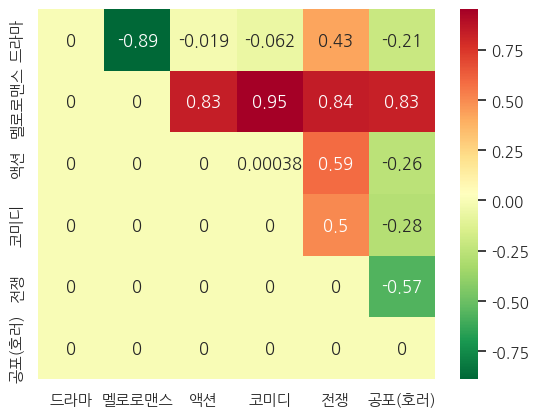

In [ ]:
import numpy as np;
import seaborn as sns;

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# **프로젝트 : 모든 장르 간 편향성 측정해보기**

**실험 조건 설정**
*   데이터 조건
    *   사용 데이터 : 2001~2019년 영화 시놉시스 텍스트
    *   전처리 : 형태소 분석, 명사만 사용, 한 글자 명사 제거
    *   감정, 행동, 개념 중심의 의미만 존치    
*   임베딩 조건
    *   모델 : Word2Vec (Skip-gram)
    *   차원 : 200
    *   window : 5
    *   min_count: 3
*   Target 및 Attribute 정의 조건
    *   Target : 영화 장르 단어
    *   Attribute : 감정, 행동
*   평가 조건
    *   지표 : WEAT score
    *   시각화 : Heatmap

**가설 설정**
*   영화 장르별 시놉시스 텍스트는 임베딩 공간에서 특정 Attribute와 유의미한 연관성을 보일 수 있음
*   WEAT score ≠ 0

**STEP 0. 프로젝트 환경 준비**

In [ ]:
!pip install konlpy gensim seaborn matplotlib tqdm

In [ ]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
4.3.2
1.6.1
0.13.2


**STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기**

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

data_path = "/content/work/weat/data/synopsis.txt"

sentences = []
with open(data_path, encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            sentences.append(line)

print("문단 수:", len(sentences))

문단 수: 71156


In [ ]:
# 명사 추출 및 최소 길이 필터링

tokenized = []

for sent in tqdm(sentences):
    nouns = okt.nouns(sent)
    nouns = [n for n in nouns if len(n) >= 2]   # 한 글자 명사 제거
    if nouns:
        tokenized.append(nouns)

print("토큰화 문단 수:", len(tokenized))
print(tokenized[:2])

100%|██████████| 71156/71156 [07:44<00:00, 153.12it/s]

토큰화 문단 수: 70411
[['사운드', '엔지니어', '상우', '유지태', '치매', '할머니', '백성희'], ['시절', '상처', '아버지', '박인환', '고모', '신신애']]


**STEP 2. 추출된 결과로 임베딩 모델 만들기**

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=tokenized,
    vector_size=200,
    window=5,
    min_count=3,
    workers=4,
    sg=1   # skip-gram
)

print("vocab size:", len(model.wv))

vocab size: 23411


In [ ]:
# most_similar() 결과 검증

model.wv.most_similar("영화")

[('영화로', 0.7275281548500061),
 ('공포영화', 0.7140940427780151),
 ('전작', 0.7081747055053711),
 ('편의', 0.7042128443717957),
 ('픽션', 0.7024914622306824),
 ('극영화', 0.6974277496337891),
 ('형식', 0.6890023350715637),
 ('주제', 0.6870517134666443),
 ('옴니버스', 0.6854424476623535),
 ('자전', 0.682952344417572)]

**STEP 3. Target과 Attribute 단어 셋 만들기**

In [ ]:
# Target : 영화 장르

targets = {
    "로맨스": ["사랑", "연애", "이별", "감정"],
    "액션": ["전투", "폭발", "추격", "전쟁"],
    "공포": ["공포", "괴물", "살인", "죽음"],
    "코미디": ["웃음", "유머", "농담", "해프닝"],
    "드라마": ["가족", "삶", "현실", "갈등"]
}

In [ ]:
# Attribute : 편향 축(감정, 행동)

attributes = {
    "긍정": ["행복", "희망", "기쁨", "사랑"],
    "부정": ["절망", "고통", "슬픔", "불행"],
    "폭력": ["살인", "전쟁", "폭력", "피"],
    "일상": ["가족", "생활", "직장", "현실"]
}

In [ ]:
def filter_vocab(words):
    return [w for w in words if w in model.wv]

targets = {k: filter_vocab(v) for k, v in targets.items()}
attributes = {k: filter_vocab(v) for k, v in attributes.items()}

targets, attributes

({'로맨스': ['사랑', '연애', '이별', '감정'],
  '액션': ['전투', '폭발', '추격', '전쟁'],
  '공포': ['공포', '괴물', '살인', '죽음'],
  '코미디': ['웃음', '유머', '농담', '해프닝'],
  '드라마': ['가족', '현실', '갈등']},
 {'긍정': ['행복', '희망', '기쁨', '사랑'],
  '부정': ['절망', '고통', '슬픔', '불행'],
  '폭력': ['살인', '전쟁', '폭력'],
  '일상': ['가족', '생활', '직장', '현실']})

**STEP 4. WEAT score 계산과 시각화**

In [ ]:
# WEAT 함수

import numpy as np

def cosine_sim(w, A):
    return np.mean([model.wv.cosine_sim(w, a) for a in A])

def weat_score(X, Y, A, B):
    return np.mean([cosine_sim(x, A) - cosine_sim(x, B) for x in X]) - \
           np.mean([cosine_sim(y, A) - cosine_sim(y, B) for y in Y])

In [ ]:
# WEAT 계산

def cosine_sim(w, A):
    return np.mean([
        model.wv.similarity(w, a)
        for a in A
        if w in model.wv and a in model.wv
    ])

def weat_score(X, Y, A, B):
    return np.mean([cosine_sim(x, A) - cosine_sim(x, B) for x in X]) - \
           np.mean([cosine_sim(y, A) - cosine_sim(y, B) for y in Y])


In [ ]:
for g in genre_names:
    for a in attr_names:
        X = targets[g]
        Y = [w for k, v in targets.items() if k != g for w in v]
        A = attributes[a]
        B = [w for k, v in attributes.items() if k != a for w in v]

        if X and Y and A and B:
            weat_matrix.loc[g, a] = weat_score(X, Y, A, B)


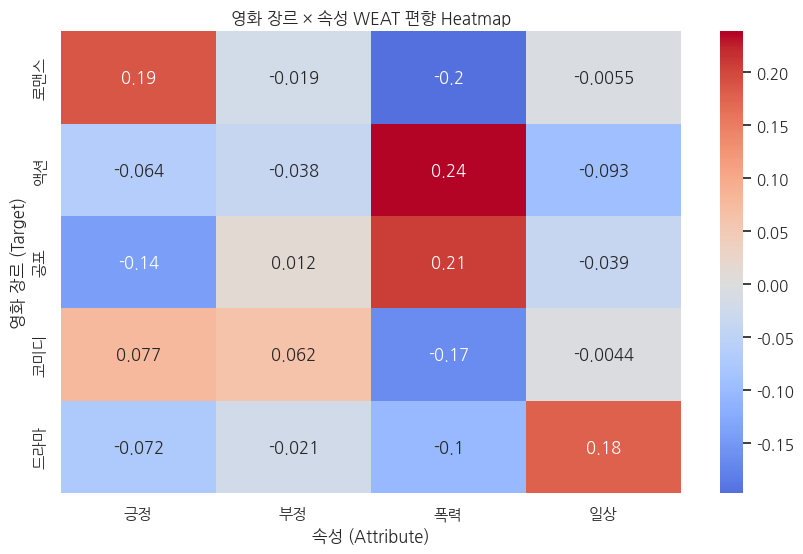

In [ ]:
# WEAT Heatmap 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    weat_matrix.astype(float),
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("영화 장르 × 속성 WEAT 편향 Heatmap")
plt.ylabel("영화 장르 (Target)")
plt.xlabel("속성 (Attribute)")
plt.show()

**결과 보고서**


1.   통계 기반 방법(TF-IDF 등)의 문제점
    
    *   기존의 단어 간 의미 관계, 문맥, 유사도를 표현할 수 없음(단어 중요도는 표현이 가능)
    *   통계 기반 방법(TF-IDF 등)은 어휘 수에 따라 벡터 차원 수가 증가하여 메모리가 증가하고 이에 따라 차원의 저주 발생
    *   의미적 일반화가 불가능하여 Out Of Vocabulary(OOV) 문제 발생    

2.   결과 분석


    *   공포 장르
      *   폭력, 부정 속성과 강한 양(+)의 WEAT score를 보임
      *   긍정·일상 속성과는 음(–)의 WEAT score를 보임
      *   공포 장르 시놉시스가 죽음, 살인, 공포, 위협 등의 개념과 강하게 결합

    *   로맨스 장르
      *   긍정과 뚜렷한 양(+)의 WEAT score
      *   긍정·일상 속성과는 음(–)의 WEAT score를 보임
      *   사랑, 감정, 관계 중심의 개념이 임베딩 공간에서도 긍정 감정 축으로 구조화

    *   액션 장르
      *   폭력과의 연관성 높음
      *   감정(긍정/부정)보다는 행동·사건 중심의 편향
      *   전투, 전쟁, 추격 등 물리적 행위 중심

    *   코미디 장르
      *   긍정·일상과의 상대적 연관성 높음
      *   폭력·부정과는 낮은 연관성을 보임
      *   코미디 장르는 일상적 상황과 긍정적 감정에 의미적으로 근접

3.   결과 의미

    *   실험 전 영화 장르별 시놉시스 텍스트는 임베딩 공간에서 특정 Attribute와 유의미한 연관성을 보일 수 있다는 가설을 검증(WEAT score ≠ 0)
    *   WEAT가 측정하려는 상대적인 의미 편향의 전형적인 결과 패턴을 보인 점에서 일반화 가능

4.   실험의 한계점 및 향후 보완 방향

    *   편향성을 WEAT score 값만으로 도출하였으나 추후에는 다른 지표로 측정하는 방법 모색
    *   Word2Vec(Skip-gram) 단일 모델을 사용하였으나 향후에는 FastText, GloVe, contextual embedding(BERT 계열)과 비교 필요
    *   Target과 Attribute 단어셋은 연구자의 정의에 따라 달라지는 의존성을 보일 수 있으며 단어셋 변경 시 WEAT score 변동이 가능할 수 있다고 판단됨




**회고**
*   Word2Vec 임베딩에 대해서 학습하고, Word Embedding Association Test(WEAT)를 적용하여 상대적인 편향성을 정량화하는 기법을 상세하게 알 수 있는 의미있는 프로젝트였다.
*   임베딩이 기존 원-핫 인코딩의 차원이 어휘 수만큼 커지고 희소 벡터 발생하는 문제를 해결한다는 점에서 필요성을 이해할 수 있었다.
*   실험을 통해서 Word2Vec과 같은 예측 기반 방법들이 의미가 비슷한 단어가 벡터 공간에서 가깝게 배치됨으로써 의미적 유사도를 계산할 수 있으며, 차원 축소와 희소성 감소로 일반화 성능이 가능해짐을 확인할 수 있었다.